<a href="https://colab.research.google.com/github/harish678/Linguipedia-Codefest-NLP/blob/master/linguipedia_codefest_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Libguipedia NLP Contest](sentiments_1920x480-thumbnail-1200x1200-90.png)

# Linguipedia NLP

## Problem Statement

**Identify the Sentiments**
Sentiment analysis remains one of the key problems that has seen extensive application of natural language processing. This time around, given the tweets from customers about various tech firms who manufacture and sell mobiles, computers, laptops, etc, the task is to identify if the tweets have a negative sentiment towards such companies or products.

## Data Description
**train.csv** - For training the models, we provide a labelled dataset of 7920 tweets. The dataset is provided in the form of a csv file with each line storing a tweet id, its label and the tweet.

**test.csv** - The test data file contains only tweet ids and the tweet text with each tweet in a new line.

**sample_submission.csv** - The exact format for a valid submission

Most profane and vulgar terms in the tweets have been replaced with “$&@*#”. However, please note that the dataset still might contain text that may be considered profane, vulgar, or offensive.

## Evaluation Metric
The submitted output will be evaluated by the **F1-Score**

#Table of Contents
1. [Understand the Problem Statement](#first)
2. [Tweets Preprocessing and Cleaning](#second)
3. [Story Generation and Visualization from Tweets](#third)
4. [Extracting Features from Cleaned Tweets](#fourth)
5. [Model Building: Sentiment Analysis](#fifth)

## I. Understand the Problem Statement <a class="anchor" id="first"></a>

*The objective of this task is to detect hate speech in tweets. For the sake of simplicity, we say a tweet contains hate speech if it has a racist or sexist sentiment associated with it. So, the task is to classify racist or sexist tweets from other tweets.*

Formally, given a training sample of tweets and labels, where label ‘1’ denotes the tweet is racist/sexist and label ‘0’ denotes the tweet is not racist/sexist, your objective is to predict the labels on the given test dataset.

## II. Tweets Preprocessing and Cleaning <a class="anchor" id="second"></a>

In [1]:
!git clone https://github.com/harish678/Linguipedia-Codefest-NLP.git

Cloning into 'Linguipedia-Codefest-NLP'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 9 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (9/9), done.


In [0]:
!mv Linguipedia-Codefest-NLP/*.csv .

In [0]:
# Load Libraries

import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings('ignore')

%matplotlib inline

In [4]:
# Read the data

train = pd.read_csv('train_2kmZucJ.csv')
test = pd.read_csv('test_oJQbWVk.csv')

print('Train Shape: {0}, Test Shape:{1}'.format(train.shape, test.shape))

Train Shape: (7920, 3), Test Shape:(1953, 2)


In [5]:
train.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


The data has 3 columns id, label, and tweet. **label** is the binary target variable and **tweet** contains the tweets that we will clean and preprocess.

In [0]:
# Remove unnecessary columns

train.drop(columns=['id'], inplace=True)
test.drop(columns=['id'], inplace=True)

In [0]:
# Combine train and test for Data preprocessing and Cleaning, Feature Engineering
combi = train.append(test, ignore_index=True)

#### Removing URL's, Punctuations, Numbers, and Special Characters, Correct Irregular Sentences

In [0]:
def clean_tweet(tweet):
    tweet = re.sub('http\S+\s*', '', tweet)  # remove URLs
    tweet = re.sub('RT|cc', '', tweet)  # remove RT and cc
    tweet = re.sub('@\S+', '', tweet)  # remove mentions
    tweet = re.sub('[%s]' % re.escape("""!"$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), '', tweet)  # remove punctuations
    tweet = re.sub('\s+', ' ', tweet)  # remove extra whitespace
    tweet = " ".join(re.split('[;,\s_]+', tweet))  # correct irregular sentences
    return tweet
  
combi['tidy_tweet'] = combi['tweet'].apply(clean_tweet)

#### Removing Short Words

In [0]:
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

#### Tokenization

Tokenization is the process of splitting a string of text into tokens.

In [0]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split()) # tokenization

#### Steming

Stemming is a rule-based process of stripping the suffixes (“ing”, “ly”, “es”, “s” etc) from a word.

In [0]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming

# combining them back
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

combi['tidy_tweet'] = tokenized_tweet

## III. Story Generation and Visualization from  <a class="anchor" id="third"></a>

### Common Words used in the tweets: WordCloud

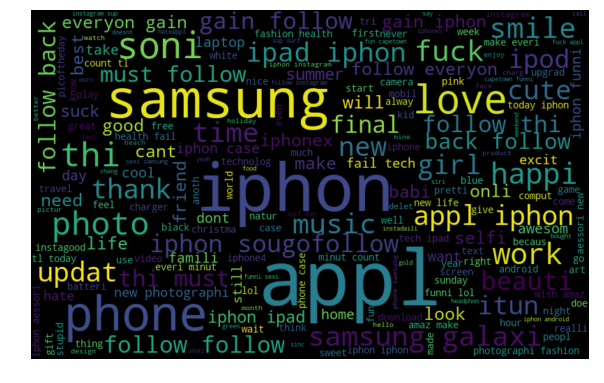

In [12]:
all_words = ' '.join([text for text in combi['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### Words in positive tweets

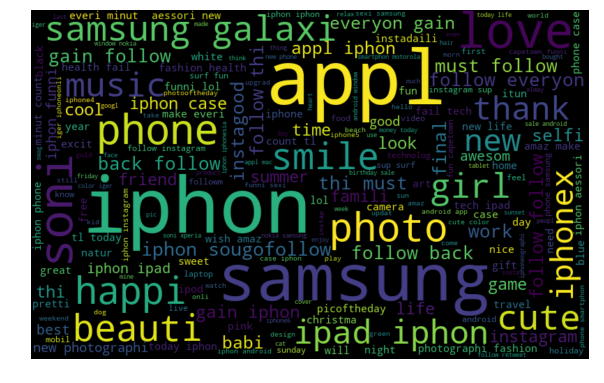

In [13]:
normal_words =' '.join([text for text in combi['tidy_tweet'][combi['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### Words in negative tweets

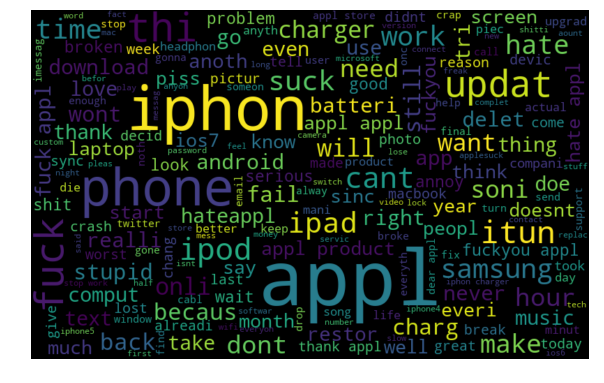

In [0]:
normal_words =' '.join([text for text in combi['tidy_tweet'][combi['label'] == 1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### Impact of Hashtags on tweets sentiment

In [0]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [0]:
# extracting hashtags from positive tweets

HT_regular = hashtag_extract(combi['tidy_tweet'][combi['label'] == 0])

# extracting hashtags from negative tweets
HT_negative = hashtag_extract(combi['tidy_tweet'][combi['label'] == 1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

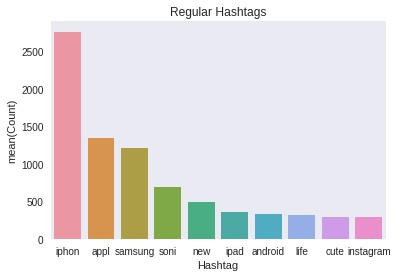

In [16]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()), 
                 'Count': list(a.values())})

# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10)
sns.barplot(data=d,x='Hashtag',y='Count')
plt.title('Regular Hashtags')
plt.grid(False)
plt.show()

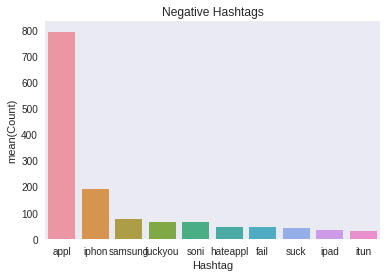

In [17]:
a = nltk.FreqDist(HT_negative)
d = pd.DataFrame({'Hashtag': list(a.keys()), 
                 'Count': list(a.values())})

# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10)
sns.barplot(data=d,x='Hashtag',y='Count')
plt.title('Negative Hashtags')
plt.grid(False)
plt.show()

## IV. Extracting Features from Cleaned Tweets <a class="anchor" id="fourth"></a>

### 1. Bag-of-Words Features

Bag-of-Words is a method to represent text into numerical features. Consider a corpus (a collection of texts) called C of D documents {d1,d2…..dD} and N unique tokens extracted out of the corpus C. The N tokens (words) will form a list, and the size of the bag-of-words matrix M will be given by D X N. Each row in the matrix M contains the frequency of tokens in document D(i).



---


Let us understand this using a simple example. Suppose we have only 2 document

**D1**: He is a lazy boy. She is also lazy.

**D2**: Smith is a lazy person.

The list created would consist of all the unique tokens in the corpus C.

= **[‘He’,’She’,’lazy’,’boy’,’Smith’,’person’]**

Here, D=2, N=6

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')

# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(combi['tidy_tweet'])

### 2. TF-IDF Features

This is another method which is based on the frequency method but it is different to the bag-of-words approach in the sense that it takes into account, not just the occurrence of a word in a single document (or tweet) but in the entire corpus.

TF-IDF works by penalizing the common words by assigning them lower weights while giving importance to words which are rare in the entire corpus but appear in good numbers in few documents.


---



Let’s have a look at the important terms related to TF-IDF:

* TF = (Number of times term t appears in a document)/(Number of terms in the document)
* IDF = log(N/n), where, N is the number of documents and n is the number of documents a term t has appeared in.
* TF-IDF = TF*IDF

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')

# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(combi['tidy_tweet'])

## V. Model Building: Sentiment Analysis <a class="anchor" id="fifth"></a>

### A. Building model using Bag-of-Words features

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression

train_bow = bow[:7920,:]
test_bow = bow[7920:,:]

# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['label'], random_state=42, test_size=0.3)

lreg = LogisticRegression()
lreg.fit(xtrain_bow, ytrain) # training the model

prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int) # calculating f1 score

0.7814018043025678

We trained the logistic regression model on the **Bag-of-Words features** and it gave us an **F1-score** of **0.78** for the validation set. Now we will use this model to predict for the test data.

In [0]:
test_pred = lreg.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test['label'] = test_pred_int
submission = test[['label']]
submission.to_csv('sub_lreg_bow.csv', index=False)

### B. Building model using TF-IDF features

In [24]:
train_tfidf = tfidf[:7920,:]
test_tfidf = tfidf[7920:,:]

xtrain_tfidf = train_tfidf[ytrain.index]
xvalid_tfidf = train_tfidf[yvalid.index]

lreg.fit(xtrain_tfidf, ytrain)

prediction = lreg.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int)

0.794961511546536

We trained the logistic regression model on the **TF-IDF features** and it gave us an **F1-score** of **0.79** for the validation set. Now we will use this model to predict for the test data.

In [0]:
test_pred = lreg.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test['label'] = test_pred_int
submission = test[['label']]
submission.to_csv('sub_lreg_tfidf.csv', index=False)